In [3]:
import matplotlib.pyplot as plt
import numpy as np
import strawberryfields as sf
from strawberryfields.apps import qchem

In [4]:
w = sf.apps.data.Water(0).w
U = sf.apps.data.Water(0).U

In [5]:
modes = 3
eng = sf.Engine("fock", backend_options={"cutoff_dim":5})
prog = sf.Program(modes)

In [6]:
input_state = [0,1,0]


In [7]:
t = 70
n_samples = 10

In [10]:
# to make samples reproducible
np.random.seed(seed=42)
samples = []

with prog.context as q:
    for i in range(modes):
        sf.ops.Fock(input_state[i]) | q[i]
    sf.ops.Interferometer(U.T) | q
    qchem. dynamics.TimeEvolution(w, t) | q
    sf.ops.Interferometer(U) | q
    sf.ops.MeasureFock() | q    
for _ in range(n_samples):
    samples.append(eng.run(prog).samples[0].tolist())    

In [11]:
print(*samples, sep ="\n")

[0, 1, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]
[0, 1, 0]
[0, 1, 0]
[0, 1, 0]
[1, 0, 0]
[1, 0, 0]
[1, 0, 0]


In [12]:
print(np.mean(samples, axis=0))

[0.6 0.4 0. ]


In [13]:
def sample(input_state, t, w, U, n_samples):
    modes = len(U)
    samples = []
    eng = sf.Engine("fock",backend_options={"cutpff_dim":5})
    prog =sf.Program(modes)

    with prog.context as q:
        for i in range(modes):
            sf.ops.Fock(input_state[i]) | q[i]
        sf.ops.Interferometer(U.T) | q
        qchem. dynamics.TimeEvolution(w, t) | q
        sf.ops.Interferometer(U) | q
        sf.ops.MeasureFock() | q    
    for _ in range(n_samples):
        samples.append(eng.run(prog).samples[0].tolist())
    return samples    

In [15]:
samples = [sf.apps.data.Water(t=time)[:] for time in range(0,270,10)]

In [19]:
prob_1 = np.array([s.count([1,0,0]) / len(s) for s in samples])
prob_2 = np.array([s.count([0,1,0]) / len(s) for s in samples])
prob_3 = np.array([s.count([0,0,1]) / len(s) for s in samples])

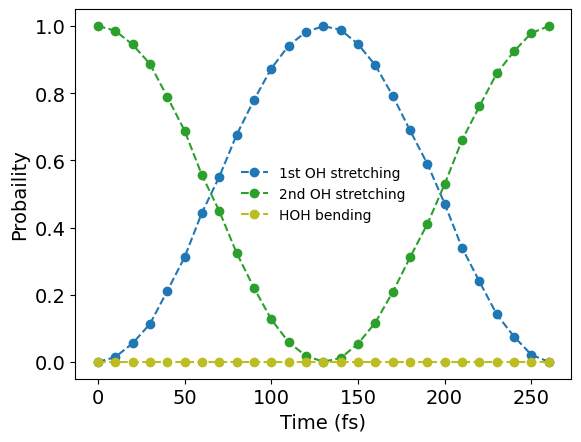

In [26]:
plt.ylabel("Probaility")
plt.xlabel("Time (fs)")
plt.rc("font",size=14)
plt.plot(range(0,270,10), prob_1 ,"o--", color="#1f77b4", label="1st OH stretching")
plt.plot(range(0,270,10), prob_2 ,"o--", color="#2ca02c", label="2nd OH stretching")
plt.plot(range(0,270,10), prob_3 ,"o--", color="#bcbd22", label="HOH bending")
plt.legend(frameon=False, prop={"size":10})
plt.show()